# Create peak travel and holiday cost


While there are some direct costs associated with traveling like airplane tickets, Airbnb accommodation, food, car rental, etc., there are also two more costs that I consider over here:

1. **Vacation day cost:** I put a cost on every vacation day that I need to use for the trip. This would push the optimization to utilize weekends over weekdays. I don't want to waste my weekends. But at the same time, if it is significantly cheaper and more convenient to travel over weekdays, the algorithm would still consider it. 

2. **Peak travel time cost:**  Many people travel around Holidays or weekends making everything busy. Skiing is less fun when you have to wait for 30 minutes for the ski lift after every run. There is an *inconvenience cost* associated with it.  Moreover, even things like lift tickets become more expensive in the peak vacation time. So I account for these factors in my analysis and call it as peak travel time cost. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Date range

I fixe my potential ski trip dates between 15th December 2018 to 21st April 2019. 

In [2]:
# Initiate a dataframe between potential ski trip days
df = pd.DataFrame(data={'date':pd.date_range(start='2018-12-15', end='2019-04-21')})
df['day'] = df['date'].dt.day_name()
df= df.set_index('date')
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 128 entries, 2018-12-15 to 2019-04-21
Data columns (total 1 columns):
day    128 non-null object
dtypes: object(1)
memory usage: 2.0+ KB


## Vacation day cost

As a PhD student, my vacation policy is pretty flexible, as long as I get my work done. Still, I don't prefer taking break over weekday. So I put a cost of $50 for every weekday I use. As a PhD student, my salary is low compared to normal jobs. This number would depend your salary. 

I also set the vacation day cost to zero on the public holidays that Brown observes. 

In [3]:
# Vacation day cost
def vacation_day_cost(x):
    if x in ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']:
        return 50
    else:
        return 0    
df['vacation_day_cost'] = df['day'].apply(vacation_day_cost)

# Set the price to take a day off on  holidays offered by Brown to 0.
brown_holidays = ['2018-12-24', '2018-12-25', '2019-1-1', '2019-1-21', '2019-2-18']
df.loc[df.index.isin(brown_holidays), 'vacation_day_cost'] = 0
df.head(9)

,day,vacation_day_cost
date,,
2018-12-15,Saturday,0
2018-12-16,Sunday,0
2018-12-17,Monday,50
2018-12-18,Tuesday,50
2018-12-19,Wednesday,50
2018-12-20,Thursday,50
2018-12-21,Friday,50
2018-12-22,Saturday,0
2018-12-23,Sunday,0


## Peak travel time cost

I divide this into two categories. Peak crowd during weekends and the crowd during holiday season. 

### Weekend crowd cost
Lift tickets and eating out is usually more expensive over the weekend. Plus there inconvenience cost of the crowd. So I set a cost of $25 for every weekend day used in the trip.

In [4]:
# Weekend crowd cost
def weekend_cost(x):
    if x in ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']:
        return 0
    else:
        return 25
    
df['weekend_cost'] = df['day'].apply(weekend_cost)
df.head()

,day,vacation_day_cost,weekend_cost
date,,,
2018-12-15,Saturday,0,25
2018-12-16,Sunday,0,25
2018-12-17,Monday,50,0
2018-12-18,Tuesday,50,0
2018-12-19,Wednesday,50,0


### Holiday crowd cost

Ski resorts are crowded with tourists during holiday seasons. So I would prefer to avoid going to resorts on such days even if it means I use more vacation days. 

From https://www.undercovertourist.com/blog/best-time-ski/ reports the falling days to be busy at ski resorts


**Busiest Days to Ski in 2018-2019:**
1. New Year's Eve — Dec. 26, 2018-Jan. 6, 2019
2. MLK Day — Jan. 18-21, 2019
3. President's Day — Feb. 15-24, 2019

**Moderate Ski Crowds in 2018-2019:**
1. Christmas — Dec. 19-25, 2018
2. Spring Break — March 8-April 7, 2019

In [5]:
df['holiday_crowd_cost'] = 0*df['weekend_cost']

# New Years eve
df.loc['2018-12-24':'2019-01-06', 'holiday_crowd_cost'] = 50

# MLK Day
df.loc['2019-01-18':'2019-01-21', 'holiday_crowd_cost'] = 50

# Presidents Day
df.loc['2019-02-15':'2019-02-24', 'holiday_crowd_cost'] = 40

# Christmas
df.loc['2018-12-19':'2018-12-23', 'holiday_crowd_cost'] = 30

# Spring break
df.loc['2019-03-08':'2019-04-07', 'holiday_crowd_cost'] = 10

df.head()

,day,vacation_day_cost,weekend_cost,holiday_crowd_cost
date,,,,
2018-12-15,Saturday,0,25,0
2018-12-16,Sunday,0,25,0
2018-12-17,Monday,50,0,0
2018-12-18,Tuesday,50,0,0
2018-12-19,Wednesday,50,0,30


### Peak crowd cost

Add weekend crowd cost and holiday crowd cost to get peak crowd travel 

In [6]:
df['peak_travel_cost'] = df['weekend_cost'] + df['holiday_crowd_cost']

## Visualize peak travel and vacation day cost

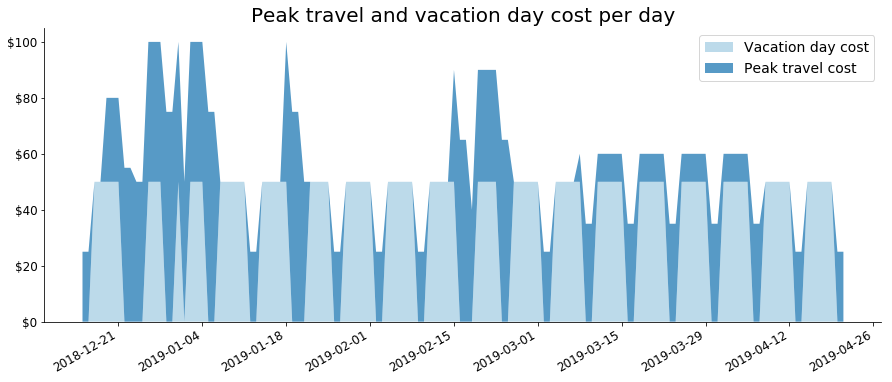

In [7]:
labels = ["Vacation day cost", "Peak travel cost"]
colors = ['#a6cee3', '#1f78b4']
fig = plt.figure(figsize=(15,6))
plt.rcParams.update({'font.size': 12})
plt.stackplot(df.index, 
              df['vacation_day_cost'],
              df['peak_travel_cost'],
              labels=labels,
              colors=colors, 
              alpha=0.75)
plt.legend(fontsize=14)
ax = fig.axes
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].set_yticklabels(['${0:0.0f}'.format(x) for x in ax[0].get_yticks()])
fig.autofmt_xdate()
ax[0].set_title('Peak travel and vacation day cost per day', fontsize=20);

## Save cleaned data

In [8]:
df.to_csv('../../Data/VacationPlanner/peaktravel_vacationday_cost.csv')